In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('../../nih_data_vol/BBox_List_2017.csv')
df.columns = [
    'Image_Index', 'Finding Label', 'x', 'y', 'w', 'h', 'Unnamed: 6',
    'Unnamed: 7', 'Unnamed: 8']
df['x'] = df['x'] / 1024
df['y'] = df['y'] / 1024
df['w'] = df['w'] / 1024
df['h'] = df['h'] / 1024
df

,Image_Index,Finding Label,x,y,w,h,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,0.219809,0.534198,0.084746,0.077331,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,0.670021,0.128460,0.181144,0.306144,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,0.216631,0.309622,0.151483,0.211864,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,0.709216,0.483351,0.137712,0.054025,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,0.644597,0.556427,0.195975,0.076271,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
979,00029464_015.png,Atelectasis,0.194278,0.344630,0.601111,0.315556,NaN,NaN,NaN
980,00025769_001.png,Atelectasis,0.685389,0.559074,0.101111,0.062222,NaN,NaN,NaN
981,00016837_002.png,Atelectasis,0.137611,0.643519,0.265556,0.092222,NaN,NaN,NaN
982,00020124_003.png,Atelectasis,0.170944,0.566852,0.238889,0.101111,NaN,NaN,NaN


In [5]:
from tqdm import tqdm

In [6]:
df_paths = pd.read_csv('../../nih_data_vol/image_paths.csv')
df_paths

,Image Index,path
0,00013118_008.png,../../nih_data_vol/images_006/images/00013118_...
1,00014716_007.png,../../nih_data_vol/images_007/images/00014716_...
2,00029817_009.png,../../nih_data_vol/images_012/images/00029817_...
3,00014687_001.png,../../nih_data_vol/images_007/images/00014687_...
4,00017877_001.png,../../nih_data_vol/images_008/images/00017877_...
...,...,...
979,00029464_015.png,../../nih_data_vol/images_012/images/00029464_...
980,00025769_001.png,../../nih_data_vol/images_011/images/00025769_...
981,00016837_002.png,../../nih_data_vol/images_008/images/00016837_...
982,00020124_003.png,../../nih_data_vol/images_009/images/00020124_...


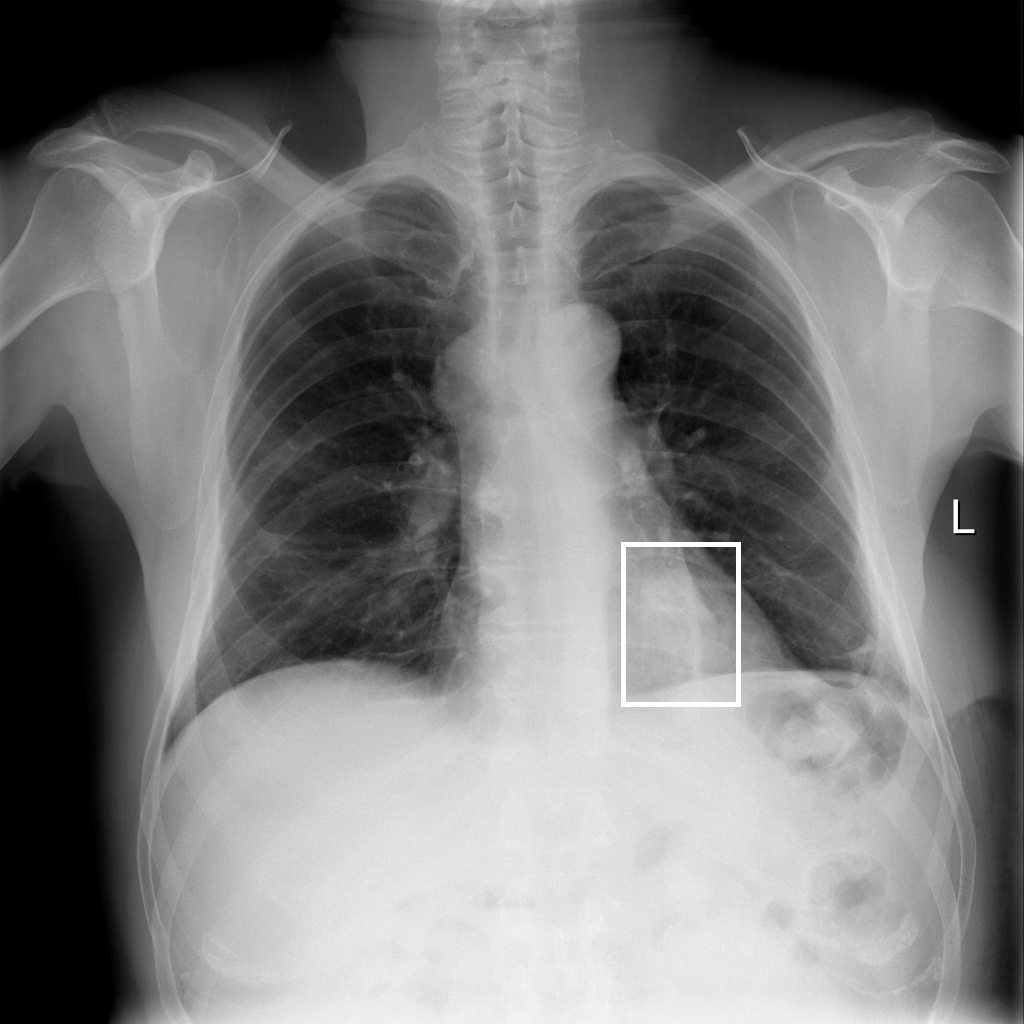

In [17]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

index = 140
sample_img = df_paths.iloc[index, :]['Image Index']
sample_path = df_paths.iloc[index, :]['path']

x, y, w, h = df.query(f'Image_Index == "{sample_img}"')\
               .iloc[0, :][['x', 'y', 'w', 'h']].values

img_pic = Image.open(sample_path).convert('RGB')
x *= img_pic.size[0]
y *= img_pic.size[0]
w *= img_pic.size[0]
h *= img_pic.size[0]

draw = ImageDraw.Draw(img_pic)
draw.rectangle(((x, y), (x + w, y + h)), outline=(255, 255, 255, 255), width=5)
img_pic.show()

## Making the Auto ML CSV

In [10]:
import os
gs_path = 'gs://nih-pngs'

new_df = df.copy(deep=True)

new_df['set'] = ['TRAINING'] * df.shape[0]
new_df['path'] = [os.path.join(gs_path, x) for x in new_df['Image_Index'].values]
new_df['label'] = new_df['Finding Label']
new_df['x_min'] = new_df['x']
new_df['y_min'] = new_df['y']
new_df['x_max'] = new_df['x_min'] + new_df['w']
new_df['y_max'] = new_df['y_min'] + new_df['h']

new_df = new_df[['set', 'path', 'label', 'x_min', 'y_min', 'x_max', 'y_max']]
new_df.columns = ['set', 'path', 'label', 'x_min', 'y_min', 'x_max', 'y_max']
new_df = new_df[['set', 'path', 'label', 
                 'x_min', 'y_min', 'x_max', 'y_min', 
                 'x_max', 'y_max', 'x_min', 'y_max']]
new_df

,set,path,label,x_min,y_min,x_max,y_min,x_max,y_max,x_min,y_max
0,TRAINING,gs://nih-pngs/00013118_008.png,Atelectasis,0.219809,0.534198,0.304555,0.534198,0.304555,0.611529,0.219809,0.611529
1,TRAINING,gs://nih-pngs/00014716_007.png,Atelectasis,0.670021,0.128460,0.851165,0.128460,0.851165,0.434605,0.670021,0.434605
2,TRAINING,gs://nih-pngs/00029817_009.png,Atelectasis,0.216631,0.309622,0.368114,0.309622,0.368114,0.521487,0.216631,0.521487
3,TRAINING,gs://nih-pngs/00014687_001.png,Atelectasis,0.709216,0.483351,0.846928,0.483351,0.846928,0.537376,0.709216,0.537376
4,TRAINING,gs://nih-pngs/00017877_001.png,Atelectasis,0.644597,0.556427,0.840572,0.556427,0.840572,0.632698,0.644597,0.632698
...,...,...,...,...,...,...,...,...,...,...,...
979,TRAINING,gs://nih-pngs/00029464_015.png,Atelectasis,0.194278,0.344630,0.795389,0.344630,0.795389,0.660185,0.194278,0.660185
980,TRAINING,gs://nih-pngs/00025769_001.png,Atelectasis,0.685389,0.559074,0.786500,0.559074,0.786500,0.621296,0.685389,0.621296
981,TRAINING,gs://nih-pngs/00016837_002.png,Atelectasis,0.137611,0.643519,0.403167,0.643519,0.403167,0.735741,0.137611,0.735741
982,TRAINING,gs://nih-pngs/00020124_003.png,Atelectasis,0.170944,0.566852,0.409833,0.566852,0.409833,0.667963,0.170944,0.667963


In [11]:
new_df.columns

Index(['set', 'path', 'label', 'x_min', 'y_min', 'x_max', 'y_min', 'x_max',
       'y_max', 'x_min', 'y_max'],
      dtype='object')

In [12]:
new_df.groupby('label').count()[['set']]

,set
label,
Atelectasis,180
Cardiomegaly,146
Effusion,153
Infiltrate,123
Mass,85
Nodule,79
Pneumonia,120
Pneumothorax,98


In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(
    new_df, random_state=0, stratify=new_df['label'], test_size=0.2
)
x_train, x_eval = train_test_split(
    x_train, random_state=42, stratify=x_train['label'], test_size=0.2
)

In [14]:
x_train['set'] = x_train['set'].apply(lambda x : 'TRAINING')
x_eval['set'] = x_eval['set'].apply(lambda x : 'VALIDATION')
x_test['set'] = x_test['set'].apply(lambda x : 'TEST')

/miniconda/envs/aeolux/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
final_df = pd.concat([x_train, x_eval, x_test])
final_df = final_df.reset_index(drop='index')
final_df

,set,path,label,x_min,y_min,x_max,y_min,x_max,y_max,x_min,y_max
0,TRAINING,gs://nih-pngs/00012299_002.png,Atelectasis,0.190944,0.562407,0.834278,0.562407,0.834278,0.640185,0.190944,0.640185
1,TRAINING,gs://nih-pngs/00019861_010.png,Cardiomegaly,0.263492,0.349206,0.785185,0.349206,0.785185,0.736508,0.263492,0.736508
2,TRAINING,gs://nih-pngs/00003394_006.png,Cardiomegaly,0.305614,0.366826,0.736758,0.366826,0.736758,0.663436,0.305614,0.663436
3,TRAINING,gs://nih-pngs/00025686_000.png,Effusion,0.582778,0.654759,0.907222,0.654759,0.907222,0.756981,0.582778,0.756981
4,TRAINING,gs://nih-pngs/00021132_000.png,Effusion,0.688889,0.200000,0.845503,0.200000,0.845503,0.664550,0.688889,0.664550
...,...,...,...,...,...,...,...,...,...,...,...
979,TEST,gs://nih-pngs/00013508_001.png,Mass,0.279365,0.504762,0.367196,0.504762,0.367196,0.595767,0.279365,0.595767
980,TEST,gs://nih-pngs/00012415_002.png,Nodule,0.389418,0.521693,0.462434,0.521693,0.462434,0.606349,0.389418,0.606349
981,TEST,gs://nih-pngs/00012636_000.png,Atelectasis,0.757672,0.519577,0.874074,0.519577,0.874074,0.587302,0.757672,0.587302
982,TEST,gs://nih-pngs/00007735_018.png,Pneumonia,0.570370,0.411640,0.774603,0.411640,0.774603,0.700529,0.570370,0.700529


In [16]:
final_df.to_csv('./auto_ml_nih.csv', header=None, index=False)